In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
data = data.drop(columns = ["Physical_Activity","Employee_ID","Mental_Health_Condition"])
data.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,No,Decrease,1,Unsatisfied,1,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,No,Increase,3,Satisfied,2,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,No,No Change,4,Unsatisfied,5,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Yes,Increase,3,Unsatisfied,3,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Yes,Decrease,3,Unsatisfied,3,Average,North America


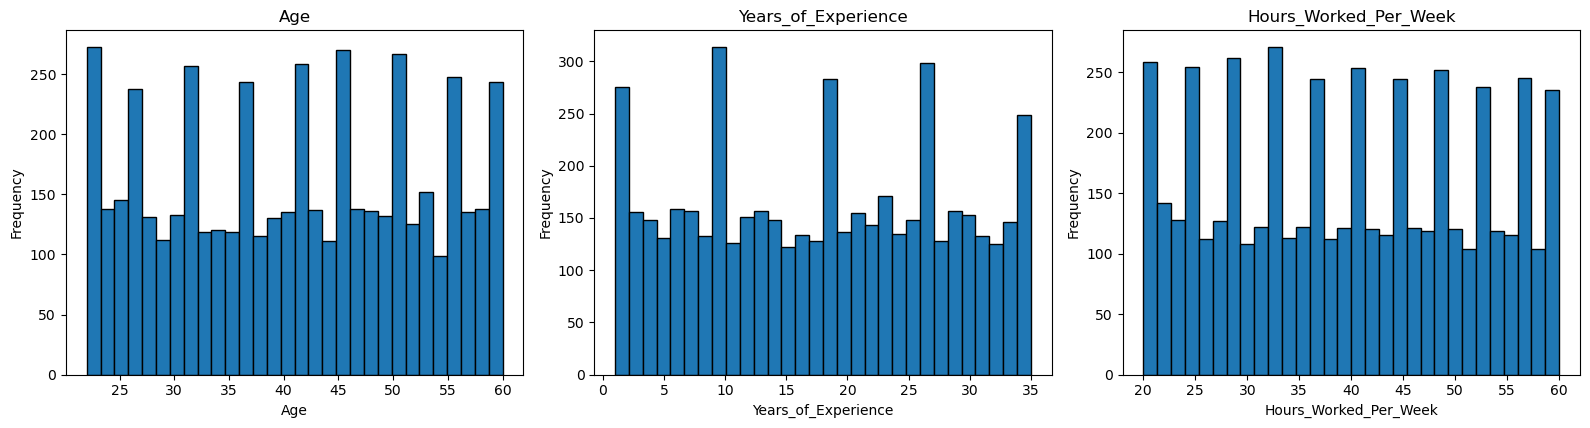

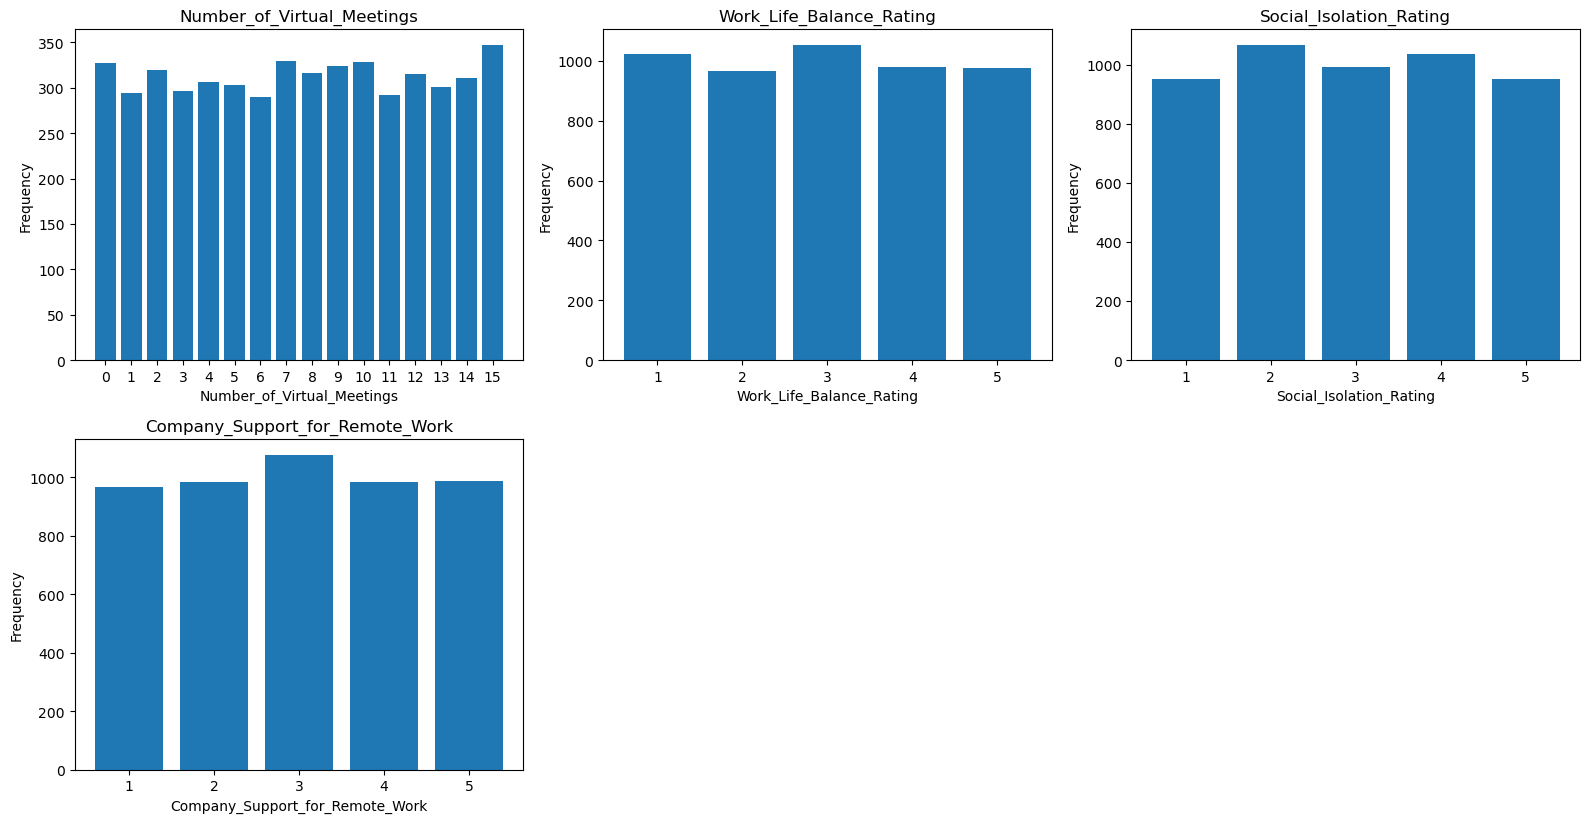

<Axes: >

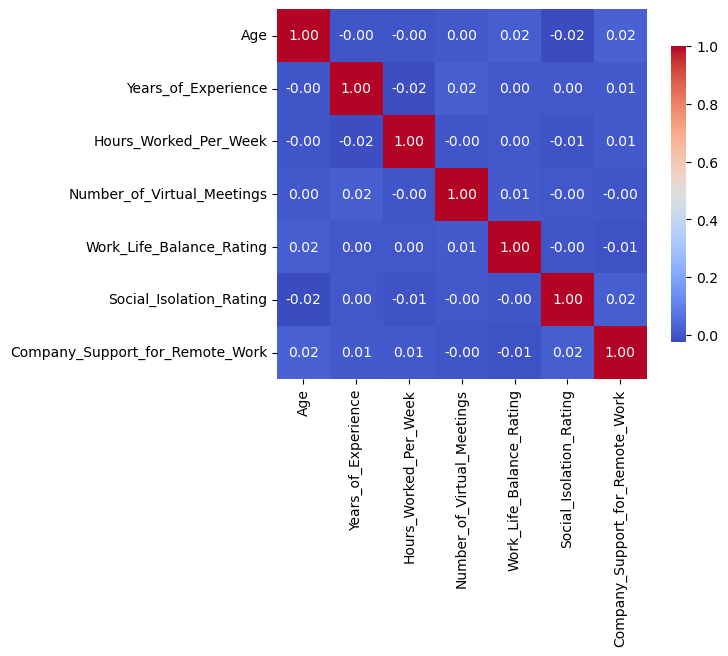

In [3]:
#eda for numerical
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(16, 12))

for i, column in enumerate(numerical_columns[:3]):
    plt.subplot(3, 3, i + 1) 
    plt.hist(data[column], bins=30, edgecolor='black')  # Create histogram
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns[3:]):  # Change the slice as needed
    plt.subplot(3, 3, i + 1)
    
    counts = data[column].value_counts().sort_index()
    
    plt.bar(counts.index, counts.values)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.xticks(ticks=counts.index)

plt.tight_layout() 
plt.show()
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

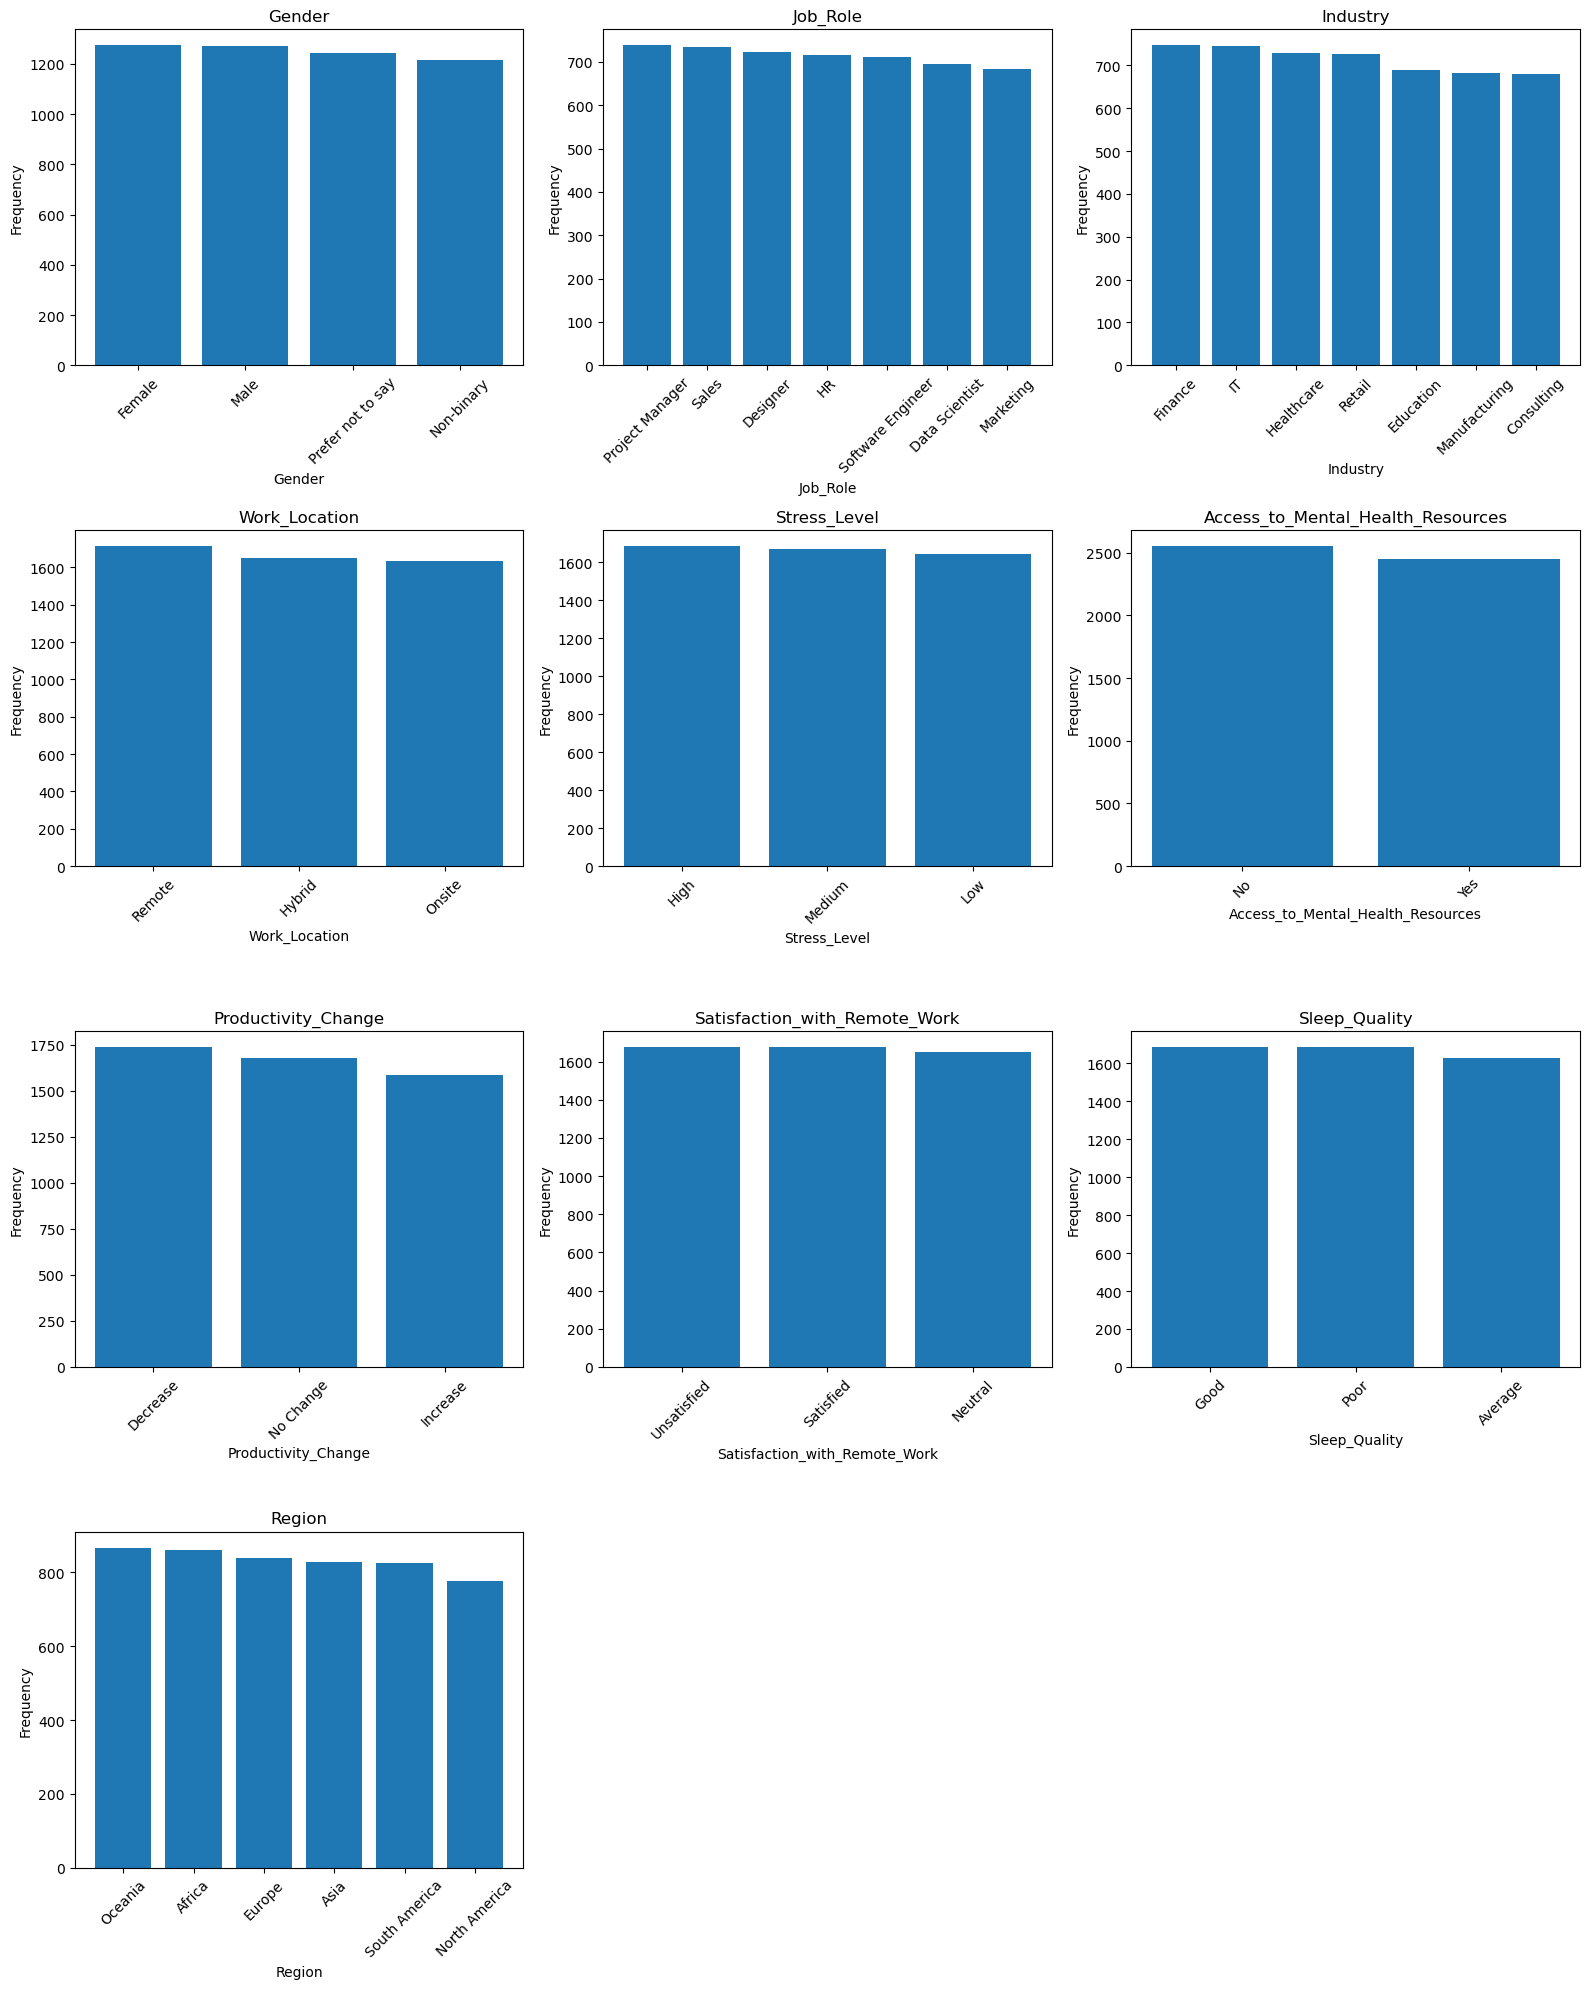

In [4]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

num_columns = 3  
num_rows = (len(non_numerical_columns) + num_columns - 1) // num_columns 

plt.figure(figsize=(16, 5 * num_rows))  

for i, column in enumerate(non_numerical_columns):
    plt.subplot(num_rows, num_columns, i + 1) 
    
    counts = data[column].value_counts()
    
    plt.bar(counts.index, counts.values)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

In [5]:
def convert_ordinal_columns(df, mapping_dict):
    for column, mapping in mapping_dict.items():
        if column in df.columns:
            mapping = {k.lower(): v for k, v in mapping.items()}
            df[column] = df[column].apply(lambda x: mapping.get(str(x).lower(), "Undefined"))  
    return df


mapping_dict = {
    'Access_to_Mental_Health_Resources': {'yes': 1, 'no': 0},
    'Satisfaction_with_Remote_Work': {'unsatisfied': 0, 'neutral': 1, 'satisfied': 2},
    'Sleep_Quality': {'poor': 0, 'average': 1, 'good': 2},
    'Stress_Level': {'low': 0, 'medium': 1, 'high': 2},
    'Productivity_Change': {'Decrease': 0, 'No Change': 1, 'Increase': 2},
    
}


converted_df = convert_ordinal_columns(data, mapping_dict)

<Axes: >

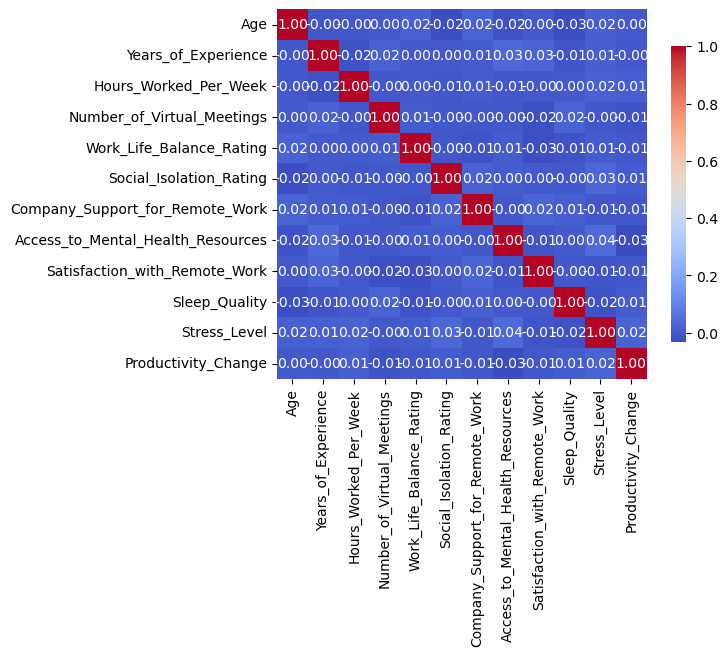

In [6]:
new_numerical_columns = numerical_columns + ["Access_to_Mental_Health_Resources","Satisfaction_with_Remote_Work","Sleep_Quality","Stress_Level","Productivity_Change"]
correlation_matrix = converted_df[new_numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})